# MATH70103: Unstructured Data Analysis
## Final Project - CID: 00926223

<i> I acknowledge that the following Project has been done by me and me alone </i> 

In the below chunk of code, we first install and enable the nbextension in Jupyter for ExecuteTime to display the run time. It will require the Kernel to be restarted which only needs to be done once.  

In [1]:
# Remove warnings from the entire notebook
import warnings
warnings.filterwarnings('ignore', category = Warning)

# Check for the module and enable the extension
%pip install pip install jupyter_contrib_nbextensions
!jupyter contrib nbextension install --user
!jupyter nbextension enable execute_time/ExecuteTime

Note: you may need to restart the kernel to use updated packages.


[I 14:13:12 InstallContribNbextensionsApp] jupyter contrib nbextension install --user
[I 14:13:12 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 14:13:12 InstallContribNbextensionsApp] Installing C:\Users\swpnl\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore -> addbefore
[I 14:13:12 InstallContribNbextensionsApp] Up to date: C:\Users\swpnl\AppData\Roaming\jupyter\nbextensions\addbefore\addbefore.yaml
[I 14:13:12 InstallContribNbextensionsApp] Up to date: C:\Users\swpnl\AppData\Roaming\jupyter\nbextensions\addbefore\icon.png
[I 14:13:12 InstallContribNbextensionsApp] Up to date: C:\Users\swpnl\AppData\Roaming\jupyter\nbextensions\addbefore\main.js
[I 14:13:12 InstallContribNbextensionsApp] Up to date: C:\Users\swpnl\AppData\Roaming\jupyter\nbextensions\addbefore\readme.md
[I 14:13:12 InstallContribNbextensionsApp] - Validating: ok
[I 14:13:12 InstallContribNbextensionsApp] Installing C

[I 14:13:13 InstallContribNbextensionsApp] Up to date: C:\Users\swpnl\AppData\Roaming\jupyter\nbextensions\varInspector\var_list.r
[I 14:13:13 InstallContribNbextensionsApp] Up to date: C:\Users\swpnl\AppData\Roaming\jupyter\nbextensions\varInspector\__pycache__\var_list.cpython-39.pyc
[I 14:13:13 InstallContribNbextensionsApp] - Validating: ok
[I 14:13:13 InstallContribNbextensionsApp] Installing C:\Users\swpnl\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\zenmode -> zenmode
[I 14:13:13 InstallContribNbextensionsApp] Up to date: C:\Users\swpnl\AppData\Roaming\jupyter\nbextensions\zenmode\main.css
[I 14:13:13 InstallContribNbextensionsApp] Up to date: C:\Users\swpnl\AppData\Roaming\jupyter\nbextensions\zenmode\main.js
[I 14:13:13 InstallContribNbextensionsApp] Up to date: C:\Users\swpnl\AppData\Roaming\jupyter\nbextensions\zenmode\README.md
[I 14:13:13 InstallContribNbextensionsApp] Up to date: C:\Users\swpnl\AppData\Roaming\jupyter\nbextensions\zenmode\zenmode.

The below cell is to check if all the required packages or modules are already installed in your current Jupyter environement. If it isnt, it will automatically install them. A kernel restart is recommended if any of the modules are not present

In [2]:
# One requirement for the below code to run is to already have subprocess installed which is a built-in module 
# Therefore there is no need to install it explicitly
import subprocess

def check_and_install(package):
    try:
        __import__(package)
        print(f'{package} is already installed.')
    except ImportError:
        print(f'{package} is not installed. Installing...')
        subprocess.check_call(["pip", "install", package])

# List of required libraries
required_libraries = ['numpy', 'pandas', 'matplotlib', 'seaborn', 'scikit-learn', 'nltk', 'wordcloud', 'gensim', 'multiprocessing']

# Check and install libraries if needed
print("Checking if all the required packages are installed. Any missing packages will be automatically installed\n")
for lib in required_libraries:
    check_and_install(lib)

Checking if all the required packages are installed. Any missing packages will be automatically installed

numpy is already installed.
pandas is already installed.
matplotlib is already installed.
seaborn is already installed.
scikit-learn is not installed. Installing...
nltk is already installed.
wordcloud is already installed.
gensim is already installed.
multiprocessing is already installed.


In [3]:
# Beginning of the code as per lecturer requirement
# Contains some basic libraries that will be used throughout the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

random_state = 42

<i> Please note that the other libraries will be loaded in the corresponding cell of usage</i> 
## Dataset Summary and Exploratory Data Analysis (EDA): 

Please click below to get directed to the Kaggle Dataset which is also contained in the git repository
<a href="https://www.kaggle.com/datasets/thedevastator/youtube-trending-videos-dataset" >Link to the Kaggle dataset</a>

### Data Load and Summary

In [4]:
# Please make sure the youtube.csv file is in the same location and has been extracted from the youtube.rar file

# Load the CSV file into a DataFrame
df = pd.read_csv('youtube.csv')

# Check basic statistics of numerical columns
print(df.describe())

# Check the data types and missing/null values
print(df.info())

# Check all the column names of the loaded DataFrame
print(df.columns)

              index    category_id         views         likes      dislikes  \
count  161470.00000  161470.000000  1.614700e+05  1.614700e+05  1.614700e+05   
mean    80734.50000      19.461151  2.419854e+06  6.566194e+04  3.490153e+03   
std     46612.51832       7.432001  1.043749e+07  2.260617e+05  3.114779e+04   
min         0.00000       1.000000  2.230000e+02  0.000000e+00  0.000000e+00   
25%     40367.25000      15.000000  1.015382e+05  1.975000e+03  8.500000e+01   
50%     80734.50000      23.000000  3.847395e+05  9.840000e+03  3.480000e+02   
75%    121101.75000      24.000000  1.339528e+06  4.006275e+04  1.350000e+03   
max    161469.00000      44.000000  4.245389e+08  5.613827e+06  1.944971e+06   

       comment_count  
count   1.614700e+05  
mean    7.035494e+03  
std     3.404121e+04  
min     0.000000e+00  
25%     2.790000e+02  
50%     1.144000e+03  
75%     4.144750e+03  
max     1.626501e+06  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161470 entries, 0 to 1

### Pre-processing 
<i>Please note for the below pre-processing some of the code from the last assignment namely “UDA_HW3_Sharma.ipynb” has been used</i>

In [5]:
# Libraries for Pre Processing function preprocess_doc
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Pre-process function that cleans up both "title" and "tags" columns 
def preprocess_doc(df):
    # removing special characters or punctuations
    df['clean_title'] = df['title'].str.replace("[^a-zA-Z#]", " ")
    df['clean_tags'] = df['tags'].str.replace("[^a-zA-Z#]", " ")

    # removing short words
    df['clean_title'] = df['clean_title'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
    df['clean_tags'] = df['clean_tags'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

    # make text lowercase
    df['clean_title'] = df['clean_title'].apply(lambda x: x.lower())
    df['clean_tags'] = df['clean_tags'].apply(lambda x: x.lower())
    
    # the below code chunk will remove all the stopwords and implement stemming
    # tokenization, remove stopwords/stemming and then detokenization
    # First for "title"
    tokenized_doc = df['clean_title'].apply(lambda x: x.split()) #split into tokens
    tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])# remove stop-words

    # de-tokenization
    detokenized_doc = []
    for i in range(len(df)):
        t = " ".join(tokenized_doc.iloc[i]) #If ILOC is not used this will not run 
        detokenized_doc.append(t)

    df['clean_title'] = detokenized_doc
    
    # Then for "tags"
    tokenized_doc = df['clean_tags'].apply(lambda x: x.split()) #split into tokens
    tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])# remove stop-words

    # de-tokenization
    detokenized_doc = []
    for i in range(len(df)):
        t = " ".join(tokenized_doc.iloc[i]) #If ILOC is not used this will not run 
        detokenized_doc.append(t)

    df['clean_tags'] = detokenized_doc
    return df


#Call the function and pass df to it
df = preprocess_doc(df)

### EDA - Distribution of Text Length

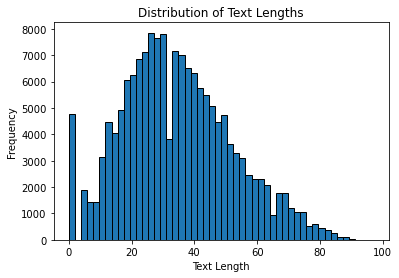

In [6]:
# Calculate the length of each text and create a new column
df['title_length'] = df['clean_title'].apply(len)

# Plot the distribution of text lengths
import matplotlib.pyplot as plt

plt.hist(df['title_length'], bins=50, edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

### EDA - Visualize Word Clouds for both "title" and "tags"

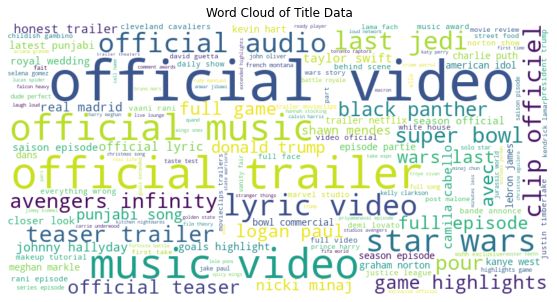

In [7]:
from wordcloud import WordCloud

# Generate a word cloud to visualize common words
all_text = ' '.join(df['clean_title'])
wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Title Data')
plt.show()

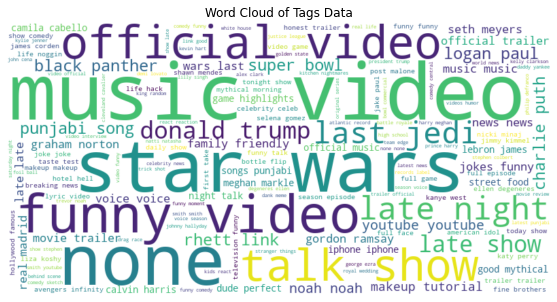

In [8]:
# Generate a word cloud to visualize common words
all_text = ' '.join(df['clean_tags'])
wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tags Data')
plt.show()

### EDA - Relationship between views and likes

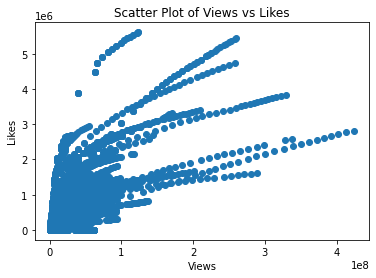

In [9]:
# Scatter plot for two numerical variables
plt.scatter(df['views'], df['likes'])
plt.title('Scatter Plot of Views vs Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()

### EDA - Temporal plot (Not needed per se but good to see a trend)

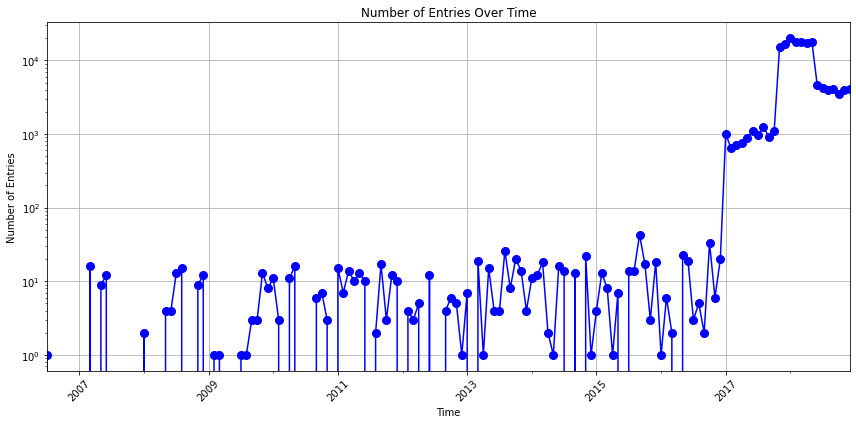

In [10]:
# Convert the timestamp column to datetime format
df['publish_date'] = pd.to_datetime(df['publish_date'])

# Set the timestamp column as the index
df.set_index('publish_date', inplace=True)

# Plot the number of entries over time with a logarithmic y-axis scale
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
df.resample('M').size().plot(marker='o', linestyle='-', color='b', markersize=8)
plt.title('Number of Entries Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Entries')
plt.grid(True)
plt.yscale('log')  # Use logarithmic scale on the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

# Reset the index to default integer indexing
df.reset_index(inplace=True)

## Method used and Hyperparameters

### Sentiment Analysis - Using SVM and Naive Bayes
Lets first look at the common code used by both methods.
#### Classify sentiment for each "title" - 20% Threshold Variable 

In [11]:
# Function to create a column "sentiment_class" in the DF based on threshold
def classify_sentiment(likes, dislikes, threshold=0.2):
    if (likes + dislikes) > 0:
        sentiment_score = (likes - dislikes) / (likes + dislikes)
        if sentiment_score > threshold: # % of likes-dislikes should be greater than 20% for the video to be positive
            return 'positive'
        elif sentiment_score < 0: # negative if dislikes are greater than likes
            return 'negative'
        else: # neutral if in the 0-20% range
            return 'neutral'
    else:
        return 'neutral'

# Invoke the function above and create "sentiment_class" for each row
df['sentiment_class'] = df.apply(lambda row: classify_sentiment(row['likes'], row['dislikes'], threshold=0.2), axis=1)

#### Function to plot a heatmap from classification report for each method

In [12]:
# Function to plot confusion matrix with a logarithmic scale using a heatmap 
def plot_confusion_matrix_log_scale(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=['positive', 'negative', 'neutral'])
    
    # Add a small constant to avoid taking the logarithm of zero
    cm_log = np.log1p(cm)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_log, annot=True, cmap='Blues', xticklabels=['positive', 'negative', 'neutral'], yticklabels=['positive', 'negative', 'neutral'])
    plt.title(title + ' (Logarithmic Scale)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### SVM TF-IDF Model

Accuracy: 0.9781383538737846

Classification Report for SVM TF-IDF:
               precision    recall  f1-score   support

    negative       0.88      0.33      0.48       373
     neutral       0.74      0.16      0.27       503
    positive       0.98      1.00      0.99     31418

    accuracy                           0.98     32294
   macro avg       0.87      0.50      0.58     32294
weighted avg       0.97      0.98      0.97     32294



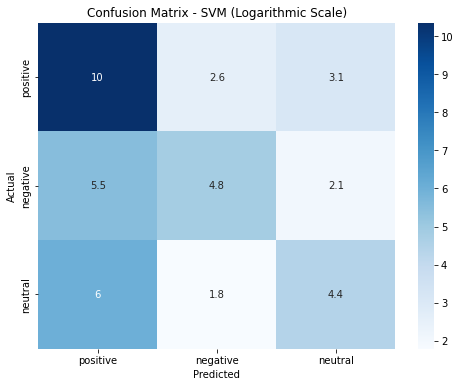

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'title' is the column containing the titles and 'label' is the sentiment label (positive, negative, neutral)
X_train, X_test, y_train, y_test = train_test_split(df['clean_title'], df['sentiment_class'], test_size=0.2, random_state=random_state)

# Convert titles to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Predict sentiment on the test set
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('\nClassification Report for SVM TF-IDF:\n', classification_report(y_test, y_pred))

# Plot confusion matrix for SVM
plot_confusion_matrix_log_scale(y_test, y_pred, title='Confusion Matrix - SVM')

### Naive Bayes TF-IDF Model

Accuracy: 0.9751966309531183

Classification Report for Naive Bayes TF-IDF:
               precision    recall  f1-score   support

    negative       0.96      0.14      0.24       373
     neutral       0.81      0.05      0.10       503
    positive       0.98      1.00      0.99     31418

    accuracy                           0.98     32294
   macro avg       0.92      0.40      0.44     32294
weighted avg       0.97      0.98      0.97     32294



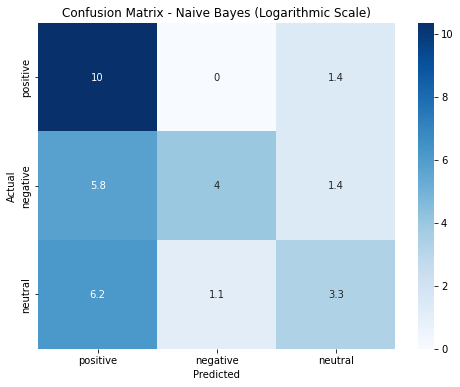

In [14]:
# Test Train Split
X_train, X_test, y_train, y_test = train_test_split(df['clean_title'], df['sentiment_class'], test_size=0.2, random_state=42)

# Convert titles to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict sentiment on the test set
y_pred = nb_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('\nClassification Report for Naive Bayes TF-IDF:\n', classification_report(y_test, y_pred))

# Plot confusion matrix for Naive Bayes
plot_confusion_matrix_log_scale(y_test, y_pred, title='Confusion Matrix - Naive Bayes')

## Topic Modelling or Information Extraction using LDA

In [15]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import multiprocessing

tags = df['clean_tags'].dropna()  # Drop rows with missing tags
processed_tags = tags.apply(lambda x: simple_preprocess(x, deacc=True))  # Tokenize and preprocess titles

# Create a dictionary and corpus
dictionary = Dictionary(processed_tags)
corpus = [dictionary.doc2bow(tags) for tags in processed_tags]

# Set the number of CPU cores to use
num_cores = multiprocessing.cpu_count()
print(f"Number of Cores/Workers = {num_cores}\n")

# Adjust other parameters as needed
lda_model = LdaMulticore(corpus, num_topics=10, id2word=dictionary, passes=1, workers=num_cores, chunksize=5000, alpha=0.1)

# Print the topics
topics = lda_model.print_topics()

# Create a DataFrame to display the results in tabular form
topic_columns = [f"Word_{i}" for i in range(1, 11)]  # Adjust the number of words as needed
df_topics = pd.DataFrame(columns=topic_columns)

for i, topic in topics:
    words = [word.split("*")[1].strip().strip('"') for word in topic.split(" + ")]
    df_topics = pd.concat([df_topics, pd.DataFrame([words], columns=topic_columns)], ignore_index=True)

# Display the DataFrame
print(df_topics)

Number of Cores/Workers = 4

    Word_1   Word_2      Word_3   Word_4       Word_5    Word_6     Word_7  \
0     star     wars     episode    super         last      news      black   
1     food    smith        best  youtube  compilation     fails      funny   
2   makeup   ramsay      gordon     link        rhett  mythical    kitchen   
3     none    music    fortnite     show      trailer     video       love   
4    video    music      comedy    funny         show  official       noah   
5    react     paul       voice    music         live     memes      logan   
6    funny     show        late   comedy        video   youtube     videos   
7  punjabi    songs       slime    kanye         ball     world       food   
8    movie  trailer      iphone     film       movies      song     review   
9     news    trump  highlights     game       sports    donald  cavaliers   

     Word_8     Word_9    Word_10  
0     cardi       jedi       bowl  
1      fail  challenge      hacks  
2  t